# Simple linear regression Model

In [3]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# read file
df = pd.read_csv('./data/Salary_dataset.csv', index_col=0)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 720.0 bytes


In [5]:
df.shape

(30, 2)

In [6]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


In [7]:
df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


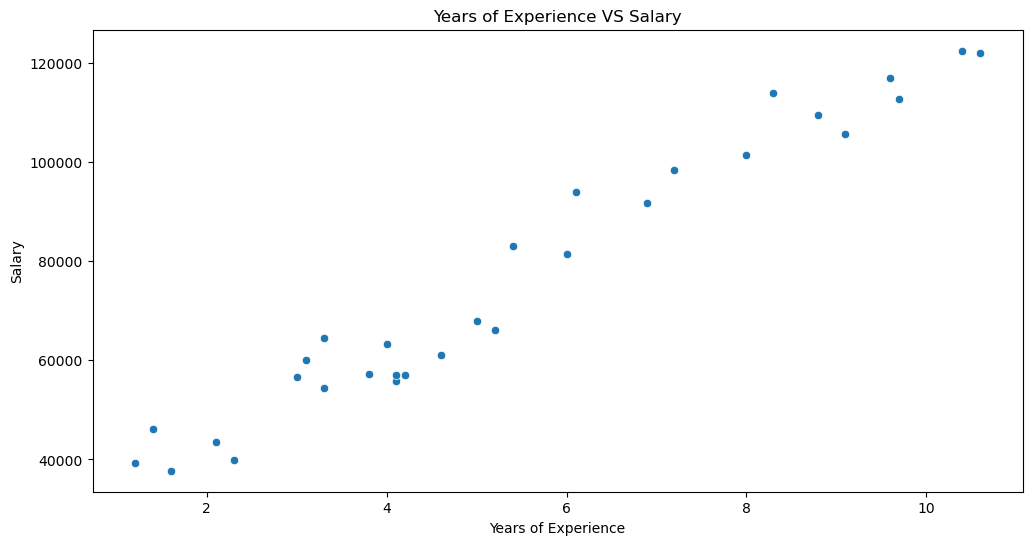

In [8]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='YearsExperience', y='Salary', data=df)
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Years of Experience VS Salary')
plt.show()

## Get b0 and b1

In [9]:
# 
# Y = bX + a
# Y = b1 + b0*X

# find b1 (interceptor)
# Formula is std from y divided by std from X and multiplied by relation coefficient(r)

def get_relation_coefficient(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    
    numerator = 0
    denominator_s1 = 0
    denominator_s2 = 0
    
    for i in range(len(x)):
        numerator += (x[i] - x_mean) * (y[i] - y_mean)
        
        denominator_s1 += (x[i] - x_mean)**2
        denominator_s2 += (y[i] - y_mean)**2
        
    full_denominator = (denominator_s1 * denominator_s2) ** (1/2)
        
    return numerator / full_denominator


In [10]:
relation_coefficient = get_relation_coefficient(df['YearsExperience'], df['Salary'])

In [57]:
relation_coefficient

np.float64(0.9782416184887598)

In [11]:
# get pendiente (coeficient)
slope = relation_coefficient * ( np.std(df['Salary']) / np.std(df['YearsExperience']))
slope

np.float64(9449.962321455076)

In [12]:
# get interceptor (sesgo)
interceptor = np.mean(df['Salary']) - slope * np.mean(df['YearsExperience'])
interceptor

np.float64(24848.2039665232)

In [13]:
def get_predicted_salary(X):
    predicted_salary = []
    
    for x_value in X.values:
        salary = interceptor + (slope * x_value)
        predicted_salary.append(salary)
    
    # pythonic    
    # X_array = df['YearsExperience'].values # O simplemente el array X que ya tenías
    # predicted_salary_vectorized = interceptor + slope * X_array
    
    return np.array(predicted_salary)

In [14]:
predicted_salary = get_predicted_salary(df['YearsExperience'])

In [56]:
predicted_salary

array([ 36188.15875227,  38078.15121656,  39968.14368085,  44693.12484158,
        46583.11730587,  53198.09093089,  54143.08716303,  56033.07962732,
        56033.07962732,  60758.06078805,  62648.05325234,  63593.04948449,
        63593.04948449,  64538.04571663,  68318.03064522,  72098.0155738 ,
        73988.00803809,  75878.00050238,  81547.97789525,  82492.9741274 ,
        90052.94398456,  92887.932681  , 100447.90253816, 103282.8912346 ,
       108007.87239533, 110842.86109176, 115567.84225249, 116512.83848464,
       123127.81210966, 125017.80457395])

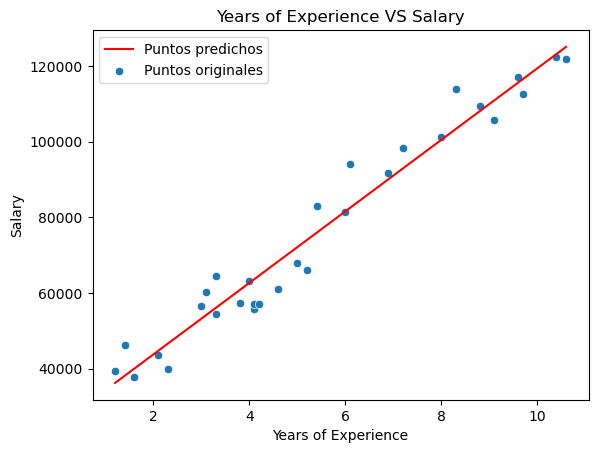

In [15]:
plt.plot(df['YearsExperience'].values, predicted_salary, color='red', label='Puntos predichos')

sns.scatterplot(x='YearsExperience', y='Salary', data=df, label='Puntos originales')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Years of Experience VS Salary')
plt.legend()
plt.show()

## Cost Function (Mean Square Error)

In [22]:
def get_mse(Y_pred, Y):
    
    # for i in range(len(Y.values)):
    #     summation.append((Y_pred[i] - Y[i]) ** 2)
    
    # direct way
    summation_array = (Y_pred - Y) ** 2
    print(summation_array)
    summation = np.sum(summation_array)
    
    return summation * 1 / len(Y)

In [30]:
mse = get_mse(predicted_salary, df['Salary'].values)
mse

np.float64(31270951.722280946)

In [27]:
rmse = mse ** (1/2)
rmse

np.float64(5592.04360876066)

In [31]:
def get_r2(Y_pred, Y):
    return 1 - ( np.sum((Y - Y_pred) ** 2) / np.sum((Y - np.mean(Y)) ** 2) )

In [34]:
r2 = get_r2(predicted_salary, df['Salary'].values)
r2

np.float64(0.9569566641435086)

In [33]:
relation_coefficient ** 2

np.float64(0.9569566641435082)

In [35]:
r2 - relation_coefficient

np.float64(-0.02128495434525124)

## Análisis de Residuos

### Verificación de Supuestos

In [36]:
# get predictes and real values
Y_pred = predicted_salary
Y = df['Salary'].values

residuals = Y_pred - Y

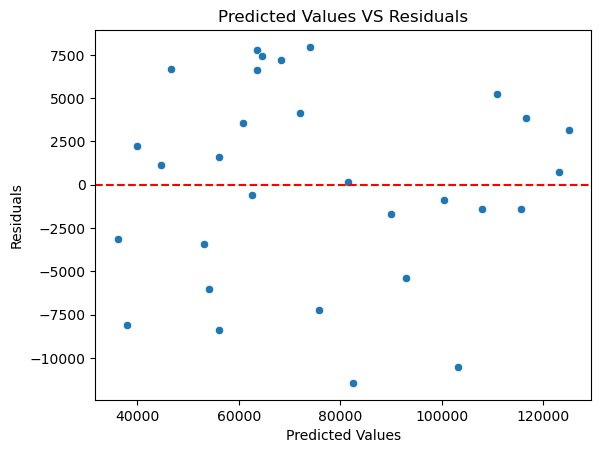

In [48]:
sns.scatterplot(x=Y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')

plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Predicted Values VS Residuals')
plt.show()

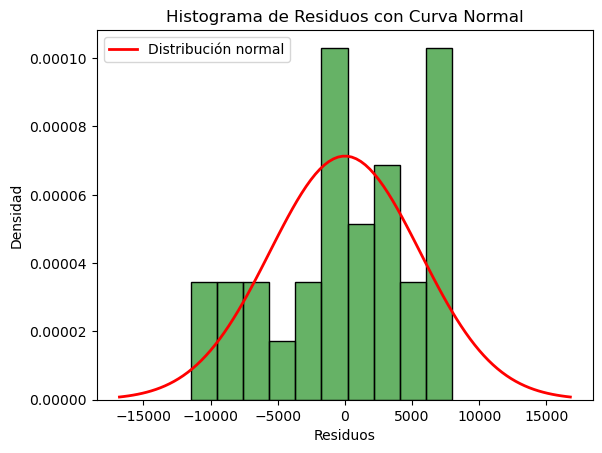

In [ ]:
# See normalization in residuals

# Calcula la media y la desviación estándar de los residuos
mu = np.mean(residuals)
sigma = np.std(residuals)

# Crea el histograma con seaborn
sns.histplot(residuals, bins=10, stat='density', color='green', alpha=0.6, edgecolor='black')

# Genera los puntos para la curva normal
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)  # Rango de valores para x (3 desviaciones estándar a cada lado)
curva_normal = (1/(sigma * np.sqrt(2 * np.pi))) * np.exp(-(x - mu)**2 / (2 * sigma**2))

# Dibuja la curva normal con matplotlib
plt.plot(x, curva_normal, 'r-', lw=2, label='Distribución normal')

# sns.histplot(residuals, kde=True) simplest but inexact way?

# Agrega etiquetas y título
plt.xlabel('Residuos')
plt.ylabel('Densidad')
plt.title('Histograma de Residuos con Curva Normal')
plt.legend()

# Muestra el gráfico
plt.show()

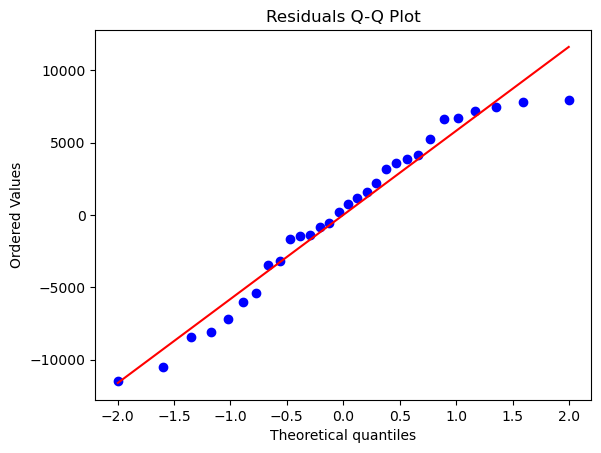

In [52]:
# GG plot
from scipy import stats

stats.probplot(residuals, dist='norm', plot=plt)
plt.title('Residuals Q-Q Plot')
plt.show()